<br>

## 이미지 변형 소스코드

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

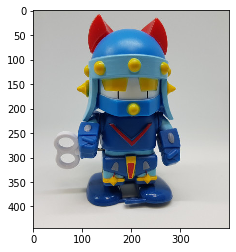

In [9]:
# 이미지 불러오기
src = cv2.imread('taekwonv1.jpg')

# 이미지 출력하기
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()

##### 이미지 변형 하더라도 imshow()는 BGR 패턴으로 인식하기 때문에 원하는 모습 보려면 재 변환해야 함
- HSV : Hue, Saturation, Value(색상, 채도, 명도)
- HSV에서 H는 유일하게 0-180으로 표현되고 나머지는 0-255로 표현된다. 이로 인해 이미지가 깨진 것 처럼 보임.
- 색상 공간 코드 패턴 : '원본이미지의 색상 공간' 2 '결과 이미지의 색상 공간'
- 색상 공간 변환 규칙 : 
    - 8비트 이미지의 색상 범위 0~255
    - 16비트 이미지의 색상 범위 0~65,536
    - 32비트 이미지의 색상 범위 0.0~1.0

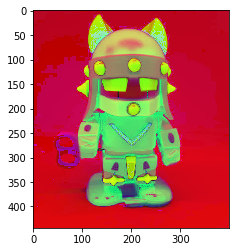

In [14]:
# 이미지 불러오기
src = cv2.imread('taekwonv1.jpg')
dst = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 이미지 창 띄워서 보는 코드
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 색상 검출
- 채널을 분리하면 mv[0], mv[1], mv[2] 의 3개 채널이 분리되서 값이 나온다.
- 채널 병합시, 리스트의 각 요소를 나눠서 변수에 할당할 수 있다.
- 배열 요소의 범위 설정: 해당 채널에서 특정 범위의 값으로 검출해야 해서 사용

In [20]:
# 채널 분리 함수
c0, c1, c2 = cv2.split(dst)
print(c0, c1, c2)

[[36 36 36 ... 36 36 36]
 [36 36 36 ... 36 36 36]
 [36 36 36 ... 36 36 36]
 ...
 [13 13 13 ... 19 19 19]
 [13 13 13 ... 19 19 19]
 [13 13 13 ... 19 19 19]] [[7 7 7 ... 7 7 7]
 [7 7 7 ... 7 7 7]
 [7 7 7 ... 7 7 7]
 ...
 [8 8 8 ... 9 9 9]
 [8 8 8 ... 9 9 9]
 [8 8 8 ... 9 9 9]] [[181 181 181 ... 186 186 186]
 [181 181 182 ... 186 186 186]
 [181 182 182 ... 186 186 186]
 ...
 [222 222 222 ... 221 222 222]
 [222 222 222 ... 221 222 222]
 [222 222 222 ... 221 222 222]]


In [21]:
# 채널 병합 함수
dst_mv = cv2.merge([c0, c1, c2])

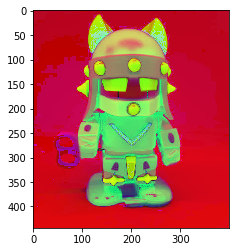

In [22]:
# 이미지 출력하기
plt.imshow(cv2.cvtColor(dst_mv, cv2.COLOR_BGR2RGB))
plt.show()

- Hue 공간의 빨간색(0~5)를 255로 변경하고, 나머지는 모두 0으로 변경했다.
- 완벽하게 검출하지 못했다. 붉은 공간은 170 이상의 수에서도 포함되어 있는 색상이며, Hue 공간에서만 검출했기 때문이다.
- 이 문제를 해결하려면, 배열 요소의 범위 설정함수를 HSV 색상공간으로 정하고, 검출한 두 요소의 배열을 하나의 공간으로 만들어야 한다.

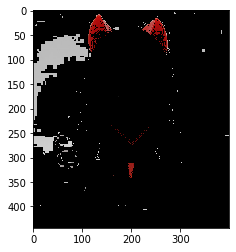

In [23]:
# 배열 요소의 범위 설정 함수

# 이미지 불러오기
src = cv2.imread('taekwonv1.jpg')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# Hue 공간 색상 검출
h, s, v = cv2.split(hsv)
h_red = cv2.inRange(h, 0, 5)

dst_red = cv2.bitwise_and(hsv, hsv, mask=h_red)
dst_red = cv2.cvtColor(dst_red, cv2.COLOR_HSV2BGR)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(dst_red, cv2.COLOR_BGR2RGB))
plt.show()

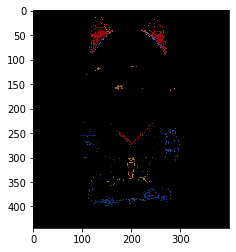

In [25]:
# 색상 검출 2

# 이미지 불러오기
src = cv2.imread('taekwonv1.jpg')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# Hue 공간 색상 검출
h, s, v = cv2.split(hsv)

orange = cv2.inRange(hsv, (8,100,100), (20,255,255))
blue = cv2.inRange(hsv, (110,130,100), (179,255,255))
mix_color = cv2.addWeighted(orange, 1.0, blue, 1.0, 0.0)

dst_mixed = cv2.bitwise_and(hsv, hsv, mask=mix_color)
dst_mixed = cv2.cvtColor(dst_mixed, cv2.COLOR_HSV2BGR)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(dst_mixed, cv2.COLOR_BGR2RGB))
plt.show()

### 이진화(threshold)
- 기준값에 따라 이분법적으로 구분해 픽셀을 참/거짓 으로 나누는 연산이다.
    - THRESH_Mask: 검은색 이미지로 변경
    - THRESH_Otsu: 오츠 알고리즘 적용(단일 채널 이미지에만 적용)
    - THRESH_Triangle: 삼각형 알고리즘 적용(단일 채널 이미지에만 적용)

- 원본 이미지에 직접적으로 이진화 함수를 적용한 예제. 색상이 극단적으로 표현되는 것을 알 수 있다.

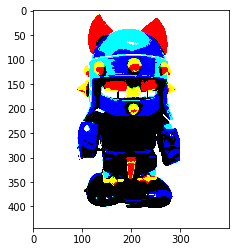

In [28]:
# 이미지 불러오기
src = cv2.imread('taekwonv1.jpg')

# 이진화
_, binary = cv2.threshold(src, 127, 255, cv2.THRESH_BINARY)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(binary, cv2.COLOR_BGR2RGB))
plt.show()

In [62]:
# 오츠 알고리즘 : 밝기 분포(히스토그램)에서 최적의 임계값을 찾아 이진화 하는 알고리즘(두 개의 클래스를 분류, 분산 최소/최대 지점)

# 이미지 불러오기
src = cv2.imread('taekwonv1.jpg')
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 이진화
otsu = cv2.threshold(src, 127, 255, cv2.THRESH_OTSU)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(otsu, cv2.COLOR_GRAY2BGR))
plt.show()

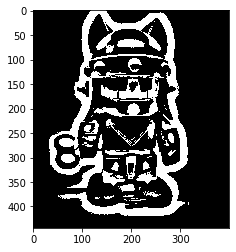

In [53]:
# 적응형 이진화

src = cv2.imread('taekwonv1.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

adt_binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, -5)

plt.imshow(cv2.cvtColor(adt_binary, cv2.COLOR_GRAY2BGR))
plt.show()

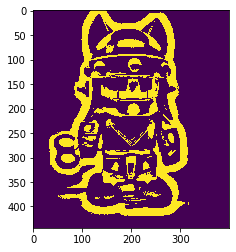

In [51]:
plt.imshow(adt_binary)
plt.show()

In [ ]:
cv2.imshow("adt_binary", adt_binary)
cv2.waitKey(0)
cv2.destroyAllWindows()